Challenge: Feedback analysis
Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
amazon_cells_raw = pd.read_csv('amazon_cells_labelled.txt', '\t', header=None)
amazon_cells_raw.columns = ['text', 'sentiment']

In [57]:
amazon_cells_raw = pd.read_csv('amazon_cells_labelled.txt', '\t', header=None)


In [58]:
amazon_cells_raw.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [61]:
amazon_cells_raw.columns = ['text', 'sentiment']
amazon_cells_raw.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


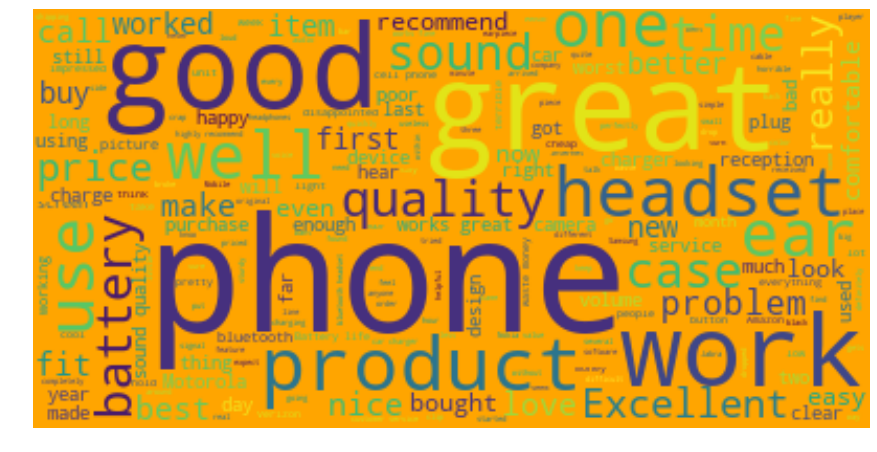

In [65]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(amazon_cells_raw["text"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [7]:
#Find the frequency of words in the text
import re #Regular Expression
import string
frequency = {}
document_text = open('amazon_cells_labelled.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency[words])

there 17
way 7
for 121
plug 11
here 4
the 519
unless 3
converter 1
good 77
case 29
excellent 27
value 5
great 99
jawbone 3
tied 1
charger 19
conversations 3
lasting 2
more 19
than 28
minutes 6
major 1
problems 12
mic 4
have 73
jiggle 1
get 22
line 5
right 12
decent 4
volume 12
you 71
several 7
dozen 1
hundred 1
contacts 3
then 17
imagine 1
fun 1
sending 4
each 1
them 13
one 41
are 42
razr 5
owner 1
must 4
this 208
needless 1
say 7
wasted 2
money 19
what 17
waste 14
and 311
time 27
sound 43
quality 49
was 90
very 104
impressed 9
when 22
going 6
from 33
original 5
battery 46
extended 2
two 14
were 4
seperated 1
mere 1
started 5
notice 2
excessive 1
static 3
garbled 1
headset 48
though 3
design 11
odd 1
ear 35
clip 4
not 117
comfortable 17
all 41
highly 9
recommend 26
any 20
who 3
has 34
blue 4
tooth 2
phone 168
advise 2
everyone 3
fooled 1
far 13
works 47
clicks 1
into 10
place 4
that 82
makes 11
wonder 1
how 9
long 13
mechanism 1
would 34
last 8
went 7
motorola 13
website 2
followed 1
d

recessed 1
holding 2
avoiding 1
broken 2
smoking 1
sprint 3
linked 1
effort 1
possesed 1
idea 1
trash 1
research 1
development 1
division 1
knows 1
doing 1
killer 1
course 1
breaking 2
infuriating 1
walkman 1
charges 1
feel 3
europe 1
asia 1
clipping 1
deffinitely 1
cent 1
coming 2
behing 1
comfortible 1
day 4
pain 1
quick 2
arrival 1
fraction 1
samsung 6
crappy 1
seeen 1
stopped 1
needed 3
operate 2
interface 1
decade 1
compete 1
designs 1
paired 2
treo 4
usb 4
transceiver 1
steer 1
genuine 1
replacementr 1
pens 1
come 2
pack 1
buyit 1
beats 1
fingers 1
plus 3
believe 1
steep 1
point 1
cases 5
normally 1
apart 1
haul 1
dissapointing 1
brand 2
extra 4
originally 1
discarded 1
players 1
posted 1
detailed 1
comments 1
grey 1
red 2
pay 3
guess 1
existing 1
cds 1
connection 5
surprised 1
reviews 2
fabulous 1
currently 1
shooters 1
delay 1
messes 1
bitpim 1
program 1
transfer 1
accessory 1
manufacturer 1
performed 1
awful 4
muffled 1
tinny 3
incoming 1
severe 1
echo 2
wind 2
resistant 1
ove

In [33]:
frequency

{'very': 65,
 'slow': 6,
 'moving': 4,
 'aimless': 1,
 'movie': 182,
 'about': 50,
 'distressed': 1,
 'drifting': 1,
 'young': 4,
 'man': 13,
 'not': 73,
 'sure': 3,
 'who': 39,
 'was': 186,
 'more': 31,
 'lost': 4,
 'the': 849,
 'flat': 2,
 'characters': 35,
 'audience': 5,
 'nearly': 1,
 'half': 6,
 'whom': 2,
 'walked': 2,
 'out': 42,
 'attempting': 1,
 'artiness': 1,
 'with': 90,
 'black': 10,
 'white': 8,
 'and': 434,
 'clever': 5,
 'camera': 10,
 'angles': 2,
 'disappointed': 6,
 'became': 2,
 'even': 40,
 'ridiculous': 5,
 'acting': 43,
 'poor': 6,
 'plot': 28,
 'lines': 7,
 'almost': 9,
 'non': 5,
 'existent': 1,
 'little': 17,
 'music': 14,
 'anything': 8,
 'speak': 3,
 'best': 25,
 'scene': 14,
 'when': 29,
 'gerardo': 1,
 'trying': 4,
 'find': 10,
 'song': 4,
 'that': 165,
 'keeps': 2,
 'running': 2,
 'through': 10,
 'his': 42,
 'head': 3,
 'rest': 4,
 'lacks': 6,
 'art': 13,
 'charm': 2,
 'meaning': 3,
 'emptiness': 1,
 'works': 5,
 'guess': 5,
 'because': 25,
 'empty': 2,


In [40]:
help(re.findall)

Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [8]:
document_text = open('amazon_cells_labelled.txt', 'r')
text_string = document_text.read().lower()
text_string

'so there is no way for me to plug it in here in the us unless i go by a converter.\t0\ngood case, excellent value.\t1\ngreat for the jawbone.\t1\ntied to charger for conversations lasting more than 45 minutes.major problems!!\t0\nthe mic is great.\t1\ni have to jiggle the plug to get it to line up right to get decent volume.\t0\nif you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nif you are razr owner...you must have this!\t1\nneedless to say, i wasted my money.\t0\nwhat a waste of money and time!.\t0\nand the sound quality is great.\t1\nhe was very impressed when going from the original battery to the extended battery.\t1\nif the two were seperated by a mere 5+ ft i started to notice excessive static and garbled sound from the headset.\t0\nvery good quality though\t1\nthe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nhighly recommend for any one who has a blue tooth phone.\t1\ni advise everyon

In [9]:
document_text = open('amazon_cells_labelled.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
match_pattern

['there',
 'way',
 'for',
 'plug',
 'here',
 'the',
 'unless',
 'converter',
 'good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'than',
 'minutes',
 'major',
 'problems',
 'the',
 'mic',
 'great',
 'have',
 'jiggle',
 'the',
 'plug',
 'get',
 'line',
 'right',
 'get',
 'decent',
 'volume',
 'you',
 'have',
 'several',
 'dozen',
 'several',
 'hundred',
 'contacts',
 'then',
 'imagine',
 'the',
 'fun',
 'sending',
 'each',
 'them',
 'one',
 'one',
 'you',
 'are',
 'razr',
 'owner',
 'you',
 'must',
 'have',
 'this',
 'needless',
 'say',
 'wasted',
 'money',
 'what',
 'waste',
 'money',
 'and',
 'time',
 'and',
 'the',
 'sound',
 'quality',
 'great',
 'was',
 'very',
 'impressed',
 'when',
 'going',
 'from',
 'the',
 'original',
 'battery',
 'the',
 'extended',
 'battery',
 'the',
 'two',
 'were',
 'seperated',
 'mere',
 'started',
 'notice',
 'excessive',
 'static',
 'and',
 'garbled',
 'sou

In [45]:
#Top 50 Keywords


keywords = ['phone','work','very','great','good','use','product','headset','quality','battery','sound','ear','one','well',
           'case','real','time','get','price','excellent','recommend','look','call','problem','did','buy','fit','nice','best',
           'service','charger','dissapoint','just','love','new','item','purchase','better','ever','money','chagre','car',
           'poor','bluetooth','becuase','bought','comfortable','easy','frist','reception']

#Columns to identify if keyword in review
for key in keywords:
    amazon_cells_raw[str(key)] = amazon_cells_raw.text.str.contains(
        str(key), 
        case=False
    )

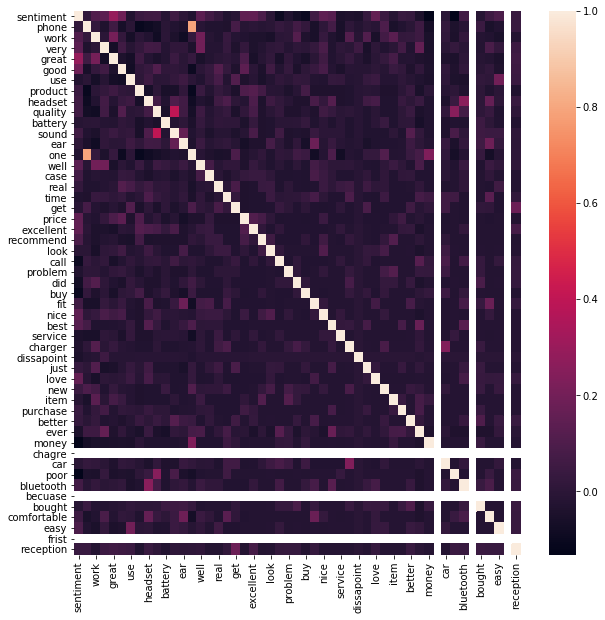

In [23]:
#Heatmap showing independence
plt.figure(figsize=(10,10))
sns.heatmap(amazon_cells_raw.corr())


Most of the words show strong dependence with each other.

In [16]:
# Setting x and y values
data = amazon_cells_raw[keywords]
target = amazon_cells_raw['sentiment']

In [17]:
data

,phone,work,very,great,good,use,product,headset,quality,battery,...,chagre,car,poor,bluetooth,becuase,bought,comfortable,easy,frist,reception
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
target

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    1
972    0
973    0
974    0
975    1
976    1
977    1
978    1
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: sentiment, Length: 1000, dtype: int64

In [19]:
# Our data is binary / boolean, therefore making use of the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 240


In [25]:
#Repeating with Yelp data

yelp = pd.read_csv('yelp_labelled.txt', '\t', header=None)
yelp.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    yelp[str(key)] = yelp.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = yelp[keywords]
target = yelp['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 321


In [52]:
#Find the frequency of words in the text
import re #Regular Expression
import string
frequency = {}
document_text = open('imdb_labelled.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency[words])
    

very 65
slow 6
moving 4
aimless 1
movie 182
about 50
distressed 1
drifting 1
young 4
man 13
not 73
sure 3
who 39
was 186
more 31
lost 4
the 849
flat 2
characters 35
audience 5
nearly 1
half 6
whom 2
walked 2
out 42
attempting 1
artiness 1
with 90
black 10
white 8
and 434
clever 5
camera 10
angles 2
disappointed 6
became 2
even 40
ridiculous 5
acting 43
poor 6
plot 28
lines 7
almost 9
non 5
existent 1
little 17
music 14
anything 8
speak 3
best 25
scene 14
when 29
gerardo 1
trying 4
find 10
song 4
that 165
keeps 2
running 2
through 10
his 42
head 3
rest 4
lacks 6
art 13
charm 2
meaning 3
emptiness 1
works 5
guess 5
because 25
empty 2
wasted 7
two 13
hours 4
saw 12
today 4
thought 12
good 58
effort 1
messages 1
for 105
kids 8
bit 5
predictable 10
loved 10
casting 6
jimmy 2
buffet 1
science 1
teacher 1
those 12
baby 1
owls 1
were 38
adorable 4
showed 3
lot 9
florida 1
made 27
look 19
appealing 2
songs 4
muppets 1
hilarious 6
cool 7
this 292
right 13
case 2
delivers 3
everything 16
your 25


eccleston 1
control 2
tardis 1
continuation 1
turn 3
day 5
disturbing 2
memories 3
succeeded 1
places 3
forced 1
started 5
jerky 2
camerawork 2
theater 4
sick 2
summary 2
witticisms 1
weren 2
witty 2
billy 3
bob 1
rise 1
above 2
rating 4
finale 1
possibly 3
trilogy 3
kieslowski 1
ceases 2
amaze 1
favourite 3
directors 2
use 6
colours 1
flag 1
three 4
shot 5
visually 2
subtle 7
connections 1
awesome 3
mention 5
huge 4
spoiler 2
remaining 2
survivors 1
ferry 1
valentine 1
judge 1
old 8
solidifying 1
happiness 1
suffering 2
dealt 1
smile 2
wrap 1
everyone 8
loves 1
literally 2
vomited 1
roth 1
pearls 1
awarded 1
eloquently 1
francis 1
ford 1
coppola 2
earlier 3
unfolds 2
gradually 1
leaves 2
room 2
develop 1
wonderful 18
lies 1
contrast 2
directed 3
nicola 1
roeg 1
wih 1
sublime 2
translating 1
year 5
offensive 2
intelligence 4
someone 3
strives 1
greatness 1
poetry 2
muddled 1
disparate 1
reviewer 2
accurately 1
defined 1
intelligent 4
masterful 2
sense 3
pitiful 2
our 7
human 6
nature 2

behold 1
continuously 1
bertolucci 1
relationships 2
engaging 2
basic 1
sidelined 1
inexplicable 1
crew 1
regardless 1
avoid 8
costs 4
christmas 2
errol 2
flynn 2
custer 1
alongside 1
olivia 1
havilland 1
fantastic 3
known 2
dads 1
grew 1
until 2
realised 1
jim 1
connor 1
energetic 1
george 1
dull 2
hosting 1
overs 1
monotonous 1
guests 1
shenanigans 1
surrounding 2
spy 1
kidnapped 1
nasty 1
foreign 1
random 1
taxidermists 1
stewart 1
hero 1
rips 1
climax 1
embassy 1
function 1
brooding 1
menace 1
nevertheless 1
stable 1
excellently 2
tops 1
typical 1
sci 2
producers 1
scot 1
vandiver 1
nonetheless 1
campy 1
delight 2
bendingly 1
scares 1
medical 1
terminology 1
iffy 1
insulin 1
dependant 1
diabetic 1
revealing 2
complexity 1
task 1
challenges 1
facing 1
south 3
africa 2
outside 1
attempted 1
truth 1
reconciliation 1
process 2
magnificent 1
seamlessly 1
woven 1
splendid 1
view 1
subtitles 1
aversion 1
therapy 1
shakespear 2
macbeth 2
jason 1
moved 1
tears 1
monolog 1
brief 2
candle 1
s

In [51]:
print (type((words, frequency[words])))

<class 'tuple'>


In [54]:
#Repeating with imbd data

mdb = pd.read_csv('imdb_labelled.txt', '\t', header=None)
mdb.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    mdb[str(key)] = mdb.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = mdb[keywords]
target = mdb['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))






Number of mislabeled points out of a total 748 points : 275
